In [2]:
# Librerías
import matplotlib.pyplot as plt
import torch
from torch import optim
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
print("Librerías listas. Puede continuar.")

Librerías listas. Puede continuar.


In [3]:
class BaseClassifier(nn.Module):
    def __init__(self, in_dim, feature_dim, out_dim):
        super(BaseClassifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(in_dim, feature_dim, bias=True),
            nn.ReLU(),
            nn.Linear(feature_dim, out_dim, bias=True)
            )
        
    def forward(self, x):
        return self.classifier(x)

In [4]:
 # Cargamos en MNIST dataset
train_dataset = MNIST(".", train=True,
                      download=True, transform=ToTensor())
test_dataset = MNIST(".", train=False,
                     download=True, transform=ToTensor())
train_loader = DataLoader(train_dataset,
                          batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset,
                         batch_size=64, shuffle=False)


In [5]:
# Crea una instancia del modelo, el optimizador y los hiperparámetros
in_dim, feature_dim, out_dim = 784, 256, 10
lr=1e-3
loss_fn = nn.CrossEntropyLoss()
epochs=40
classifier = BaseClassifier(in_dim, feature_dim, out_dim)
optimizer = optim.SGD(classifier.parameters(), lr=lr)

def train(classifier=classifier,
          optimizer=optimizer,
          epochs=epochs,
          loss_fn=loss_fn):
        
        classifier.train()
        loss_lt = []
        for epoch in range(epochs):
            running_loss = 0.0
        for minibatch in train_loader:
            data, target = minibatch
            data = data.flatten(start_dim=1)
            out = classifier(data)
            computed_loss = loss_fn(out, target)
            computed_loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            # Realiza un seguimiento de la suma de las pérdidas de cada minibatch
            running_loss += computed_loss.item()
        loss_lt.append(running_loss/len(train_loader))
        print("Epoch: {} train loss: {}".format(epoch+1, running_loss/len(train_loader)))

        plt.plot([i for i in range(1,epochs+1)], loss_lt)
        plt.xlabel("Epoch")
        plt.ylabel("Training Loss")
        plt.title("MNIST Training Loss: optimizer {}, lr {}".format("SGD", lr))
        plt.show()

        # Guarda el estado en archivo como punto de control
        torch.save(classifier.state_dict(), 'mnist.pt')

def test(classifier=classifier, loss_fn = loss_fn):
    classifier.eval()
    accuracy = 0.0
    computed_loss = 0.0

    with torch.no_grad():
        for data, target in test_loader:
            data = data.flatten(start_dim=1)
            out = classifier(data)
            _, preds = out.max(dim=1)
            # Obtención de loss y accuracy
            computed_loss += loss_fn(out, target)
            accuracy += torch.sum(preds==target)

        print("Test loss: {}, test accuracy: {}".format(
            computed_loss.item()/(len(test_loader)*64),
            accuracy*100.0/(len(test_loader)*64)))

Epoch: 40 train loss: 2.21799204268181


ValueError: x and y must have same first dimension, but have shapes (40,) and (1,)

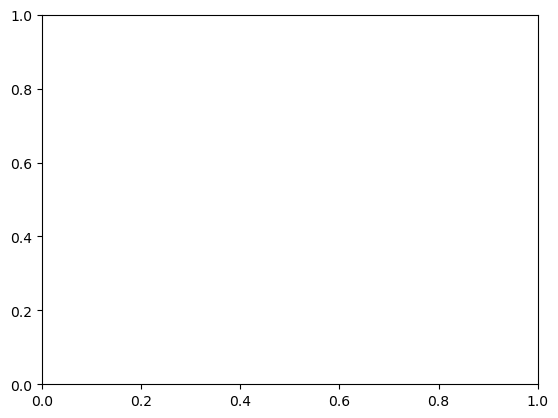

In [6]:
# Entrenamiento
train(classifier=classifier, optimizer=optimizer, epochs=40, loss_fn=loss_fn)

In [ ]:
# Prueba
test(classifier=classifier, loss_fn=loss_fn)